<a href="https://colab.research.google.com/github/seyonechithrananda/ncov-ligand-protein/blob/master/DeepChem_ligand_protein_RF_activity_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get DeepChem + RDKit working in Colab using wget and some bash commands

In [0]:
%tensorflow_version 1.x


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
!wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
!chmod +x Anaconda3-2019.10-Linux-x86_64.sh
!bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local
!conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')


--2020-04-03 16:51:05--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530308481 (506M) [application/x-sh]
Saving to: ‘Anaconda3-2019.10-Linux-x86_64.sh’

Anaconda3-2019.10-L 100%[===================>] 505.74M  83.0MB/s    in 7.0s    

2020-04-03 16:51:12 (72.1 MB/s) - ‘Anaconda3-2019.10-Linux-x86_64.sh’ saved [530308481/530308481]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py37_0
    - anaconda-navigato

In [0]:
!conda install pandas

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |           py37_0         2.8 MB
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.8.3-py37hc8dfbb8~ --> pkgs/main::conda-4.8.3-py37_0


Proceed ([y]/n)? y


conda-4.8.3          | 2.8 MB    | : 100% 1.0/1 [00:00<00:00,  1.99s/it]                 
Preparing transaction: - done
Verifying transaction: | done
Executing transaction: - done


In [0]:
import os 
import sys 
import pandas as pd

dataset_train_file = "/content/drive/My Drive/Project De Novo/AID1706_binarized_sars.csv"
dataset_eval_file = "/content/drive/My Drive/Project De Novo/evaluation_set_v2_balanced - evaluation_set_v2.csv"
dataset_train = pd.read_csv(dataset_train_file)
dataset_eval = pd.read_csv(dataset_eval_file)

In [0]:
# convert SMILES to Mol + visualize as images

import tempfile
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from itertools import islice
from IPython.display import Image, display, HTML

def display_images(filenames):
    """Helper to pretty-print images."""
    for filename in filenames:
        display(Image(filename))

def mols_to_pngs(mols, basename="test"):
    """Helper to write RDKit mols to png files."""
    filenames = []
    for i, mol in enumerate(mols):
        filename = "BACE_%s%d.png" % (basename, i)
        Draw.MolToFile(mol, filename)
        filenames.append(filename)
        if i is 10:
          break
    return filenames

print (dataset_train.shape[0])
print (dataset_eval.shape[0])

#print (Chem.MolFromSmiles(dataset_train.shape[0]))

molecules_train_x = []
molecules_train_y = []
molecules_eval_x = []
molecules_eval_y = []

for i, data in islice(dataset_train.iterrows(), dataset_train.shape[0]):
    print (data[0])
    print (data[1])
    molecules_train_x.append(Chem.MolFromSmiles(data[0]))
    molecules_train_y.append(data[1])

for _, data in islice(dataset_eval.iterrows(), dataset_eval.shape[0]):
    print (data[0])
    print (data[1])
    molecules_eval_x.append(Chem.MolFromSmiles(data[0]))
    molecules_eval_y.append(data[1])



Streaming output truncated to the last 5000 lines.
0
CC1=CC(=C(C=C1)C(=O)OCC(=O)NC(=O)CC2=CC=CC=C2)O
0
CN(CC(=O)NC1=CC(=CC=C1)F)C(=O)CSC2=CC=CC=C2F
0
CCC1=NOC(=C1C(=O)OCC(=O)NC(=O)C2=CC=CC=C2OC)C
0
CN(CC(=O)NC1=CC=C(C=C1)OC)C(=O)CC2=CSC=C2
0
C1=CSC(=C1)/C=C\2/C(=O)N(C(=S)S2)CCCC(=O)NC3=C(C=CC(=C3)[N+](=O)[O-])O
0
CC1=CC=C(C=C1)S(=O)(=O)N2CCC(CC2)C(=O)N3CCCC3C(=O)N[C@@H](CC(C)C)C(=O)NCC(=O)N
0
CCCN1C2=CC=CC=C2C(=C1O)N=NC(=O)CNC(=O)/C=C/C3=CC=C(C=C3)OC
0
C=CCN1C2=CC=CC=C2C(=C1O)N=NC(=O)CNC(=O)CC3=CC=CC=C3
0
COC1=C(C=CC(=C1)/C=N/NC(=O)C2=CC=NC=C2)O.O
0
CC1=NC(=CC=C1)NC(=O)CSC2=NC=NC3=C2C(=C(S3)C)C
0
C1CC(=O)N(C1)C(=O)COC(=O)C2=CC(=CC=C2)[N+](=O)[O-]
0
CCOC1=C(C=C(C=C1)S(=O)(=O)N2C=C(C(=O)NC2=O)F)[N+](=O)[O-]
0
CC(C)N1C2=CC=CC=C2C(=C1O)N=NC(=O)CNC(=O)C3=CC=CC=C3OC
0
CC12CCC(=O)C=C1CCC3C2C(CC4(C3CCC4(C(=O)CO)O)C)O
0
CC12CC3CC(C1)(CC(C3)(C2)N)C.[N+](=O)(O)[O-]
0
CN1C2CC(CC1C3C2O3)OC(=O)C(CO)C4=CC=CC=C4.Cl
0
CC(=O)CC(C1=CC=CC=C1)C2=C(C3=CC=CC=C3OC2=O)[O-].[Na+]
0
C1=CC(=C(C=C1C2=C(C(=O)C3=C(C

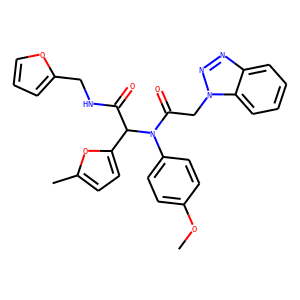

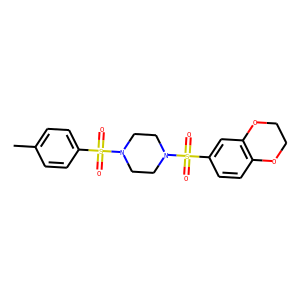

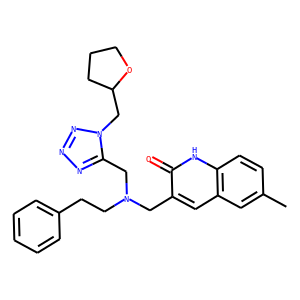

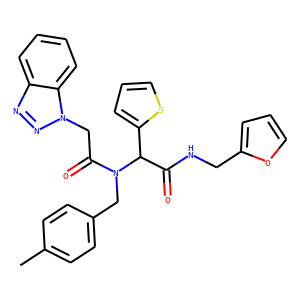

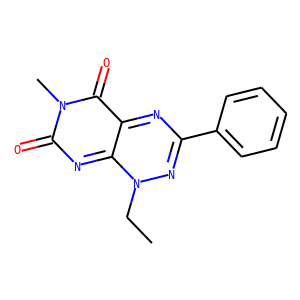

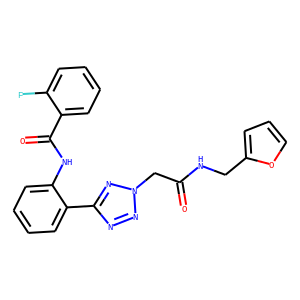

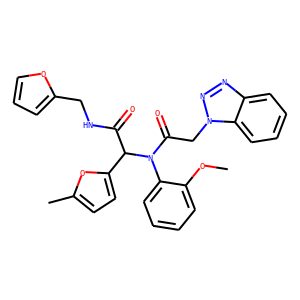

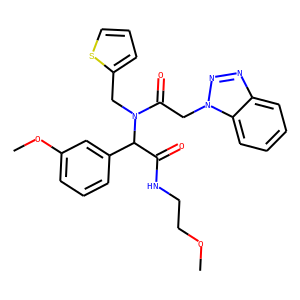

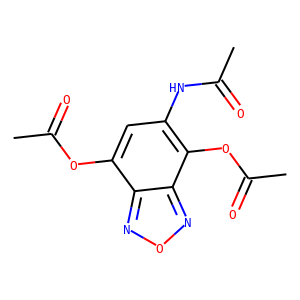

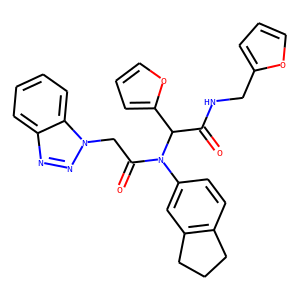

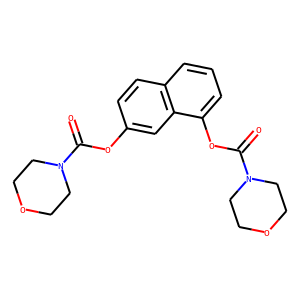

In [0]:
# Display 10 compounds from the SARS molecular assay - train
display_images(mols_to_pngs(molecules_train_x, basename="dataset"))

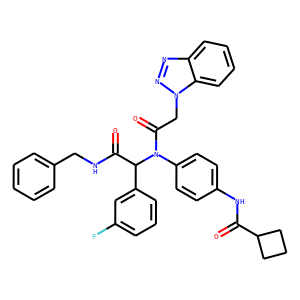

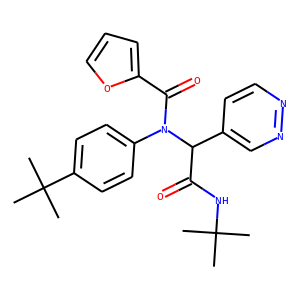

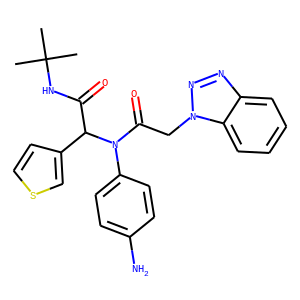

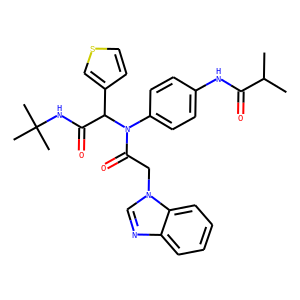

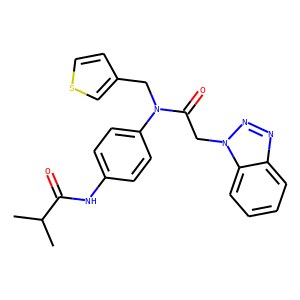

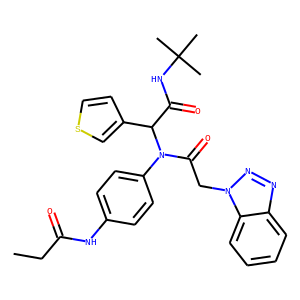

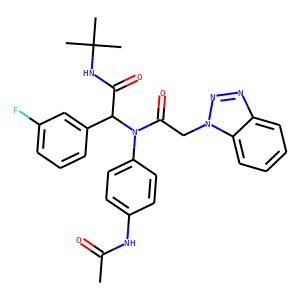

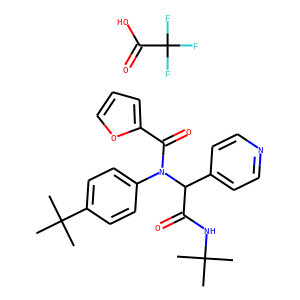

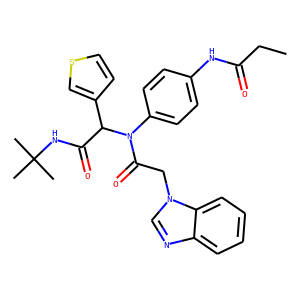

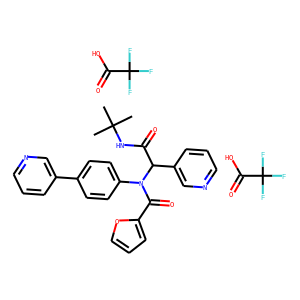

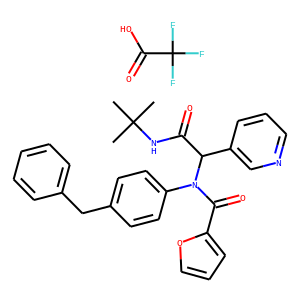

In [0]:
# Display 10 compounds from the COVID-19 molecular assay - our eval. dataset
display_images(mols_to_pngs(molecules_eval_x, basename="dataset"))


In [0]:
!conda install -c anaconda numpy

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - numpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |           py37_0         3.0 MB  anaconda
    openssl-1.1.1d             |       h7b6447c_2         3.7 MB  anaconda
    ------------------------------------------------------------
                                           Total:         6.8 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda                                           pkgs/main --> anaconda
  openssl                                         pkgs/main --> anaconda


Proceed ([y]/n)? y


openssl-1.1.1d       | 

In [0]:
# convert RDKit Mol object to Morgan fingerprint (bit vector representation) with radius 2
from rdkit import DataStructs
import numpy

molecules_train_x_fingerprint = []
molecules_eval_x_fingerprint = []

print (molecules_train_x[0])

for item in molecules_train_x:
    print (item)
    molecules_train_x_fingerprint.append(AllChem.GetMorganFingerprintAsBitVect(item,2))

print("MOVING TO EVAL DATASET")

for item_eval in molecules_eval_x:
    print (item_eval)
    molecules_eval_x_fingerprint.append(AllChem.GetMorganFingerprintAsBitVect(item_eval,2))


'''
for _, data in islice(molecules_train_x.iterrows(), molecules_train_x.shape[0]):
    print (data[0])
    print (data[1])
    molecules_train_x_fingerprint.append(AllChem.GetMorganFingerprintAsBitVect(molecules_train_x,2))

for _, data in islice(molecules_eval_x.iterrows(), molecules_eval_x.shape[0]):
    print (data[0])
    print (data[1])
    molecules_train_x_fingerprint.append(AllChem.GetMorganFingerprintAsBitVect(molecules_eval_x,2))


molecules_eval_x_fingerprint = AllChem.GetMorganFingerprintAsBitVect(molecules_eval_x, radius = 2, nBits=1024)
'''

Streaming output truncated to the last 5000 lines.
MOVING TO EVAL DATASET


'\nfor _, data in islice(molecules_train_x.iterrows(), molecules_train_x.shape[0]):\n    print (data[0])\n    print (data[1])\n    molecules_train_x_fingerprint.append(AllChem.GetMorganFingerprintAsBitVect(molecules_train_x,2))\n\nfor _, data in islice(molecules_eval_x.iterrows(), molecules_eval_x.shape[0]):\n    print (data[0])\n    print (data[1])\n    molecules_train_x_fingerprint.append(AllChem.GetMorganFingerprintAsBitVect(molecules_eval_x,2))\n\n\nmolecules_eval_x_fingerprint = AllChem.GetMorganFingerprintAsBitVect(molecules_eval_x, radius = 2, nBits=1024)\n'

In [0]:
# install sklearn
!conda install scikit-learn


Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |           py37_0         2.8 MB
    openssl-1.1.1d             |       h7b6447c_2         2.5 MB
    ------------------------------------------------------------
                                           Total:         5.3 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda                                            anaconda --> pkgs/main
  openssl                                          anaconda --> pkgs/main


Proceed ([y]/n)? y


conda-4.8.3          | 2.8 MB    | : 100% 1.0/1 [00:00<00:

In [0]:
# convert the RDKit explicit vectors into numpy arrays
np_mol_train_x = []
np_mol_eval_x = []

for mol in molecules_train_x_fingerprint:
  arr = numpy.zeros((1,))
  DataStructs.ConvertToNumpyArray(mol, arr)
  np_mol_train_x.append(arr)

for mol in molecules_eval_x_fingerprint:
  arr_2 = numpy.zeros((1,))
  DataStructs.ConvertToNumpyArray(mol, arr_2)
  print (arr_2.shape)
  np_mol_eval_x.append(arr_2)



(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)


In [0]:
print("Number of compounds in train set")
print(len(np_mol_train_x))
print("Number of compounds in validation set")
print(len(np_mol_eval_x))


Number of compounds in train set
290726
Number of compounds in validation set
99


In [0]:
import deepchem as dc
import tempfile, shutil

transformers = [
    dc.trans.NormalizationTransformer(transform_X=True, dataset=train_dataset),
    dc.trans.ClippingTransformer(transform_X=True, dataset=train_dataset)]

datasets = [np_mol_train_x, np_mol_eval_x]
for i, dataset in enumerate(datasets):
  for transformer in transformers:
      datasets[i] = transformer.transform(dataset)
np_mol_train_x, np_mol_eval_x = datasets


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


ImportError: ignored

In [0]:
# fit RF models to train, eval datasets
from sklearn.ensemble import RandomForestClassifier

def rf_model_builder(model_params, model_dir):
  sklearn_model = RandomForestClassifier(**model_params)
  return dc.models.SklearnModel(sklearn_model, model_dir)
params_dict = {
    "n_estimators": [10, 100],
    "max_features": ["auto", "sqrt", "log2", None],
}

metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
optimizer = dc.hyper.HyperparamOpt(rf_model_builder)
best_rf, best_rf_hyperparams, all_rf_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, transformers,
    metric=metric)


AttributeError: ignored

In [0]:
# No deepchem training operation
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=1123)

rf.fit(np_mol_train_x, molecules_train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1123,
                       verbose=0, warm_start=False)

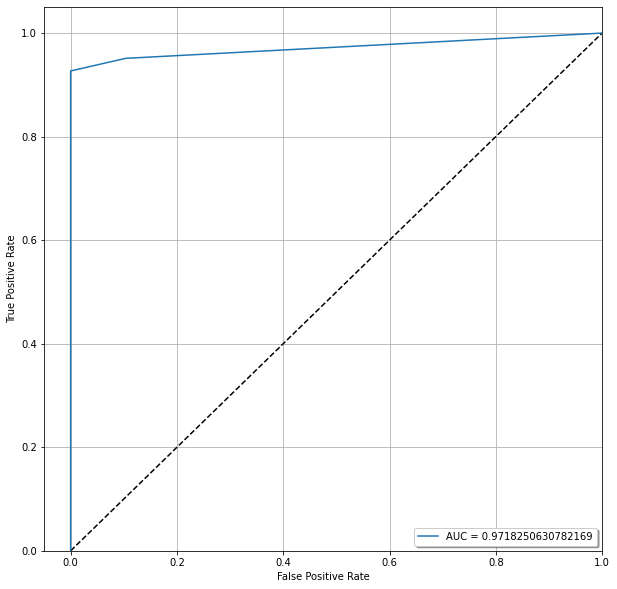

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# overall accuracy
acc = rf.score(np_mol_eval_x, molecules_eval_y)

# get roc/auc info
y_mol_score = rf.predict_proba(np_mol_eval_x)[:,1]

fpr = dict()
tpr = dict()
fpr, tpr, _= roc_curve(molecules_eval_y, y_mol_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

#make plot 
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()


In [0]:
print(y_mol_score)
print(molecules_eval_y)

print(roc_auc)

[0.2  0.05 0.17 0.05 0.07 0.31 0.51 0.   0.05 0.07 0.11 0.29 0.07 0.06
 0.26 0.33 0.07 0.3  0.05 0.07 0.11 0.29 0.2  0.32 0.04 0.07 0.58 0.02
 0.06 0.08 0.05 0.07 0.17 0.38 0.03 0.08 0.01 0.03 0.27 0.18 0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.01 0.   0.01 0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.
 0.01 0.   0.   0.   0.   0.   0.01 0.   0.   0.01 0.   0.   0.   0.
 0.  ]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0.9718250630782169


In [0]:
print (len(np_mol_eval_x))

99


In [0]:
from sklearn import metrics

y_pred_mol = rf.predict(np_mol_eval_x)
print ("Accuracy:", metrics.accuracy_score(molecules_eval_y, y_pred_mol))

Accuracy: 0.6060606060606061


In [0]:
print(y_pred_mol)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
